In [2]:
!pip install tensorflow opencv-python scikit-learn matplotlib pandas seaborn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 124.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.1 MB/s eta 0:00:00


In [3]:
# 1. Install & Import Dependencies
!pip install -q opendatasets
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import zipfile
import random


In [5]:
# 2. Unzip Dataset
zip_paths = {
    "Train": "Train.zip",
    "Test": "Test.zip",
    "Meta": "Meta.zip"
}

for name, path in zip_paths.items():
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extractall(f"/content/{name}")


In [6]:
# 3. Load and Process Train Data
train_df = pd.read_csv('Train.csv')
IMG_SIZE = 32
train_images = []
train_labels = []

for _, row in train_df.iterrows():
    img_path = os.path.join('Train', row['Path'])
    image = cv2.imread(img_path)
    if image is None:
        continue  # skip corrupt or missing files
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    train_images.append(image)
    train_labels.append(row['ClassId'])

X = np.array(train_images) / 255.0
y = np.array(train_labels)
num_classes = len(np.unique(y))
y_cat = to_categorical(y, num_classes=num_classes)

X_train, X_val, y_train, y_val = train_test_split(X, y_cat, test_size=0.2, random_state=42)


In [7]:
# 4. CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 5. Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 35s 69ms/step - accuracy: 0.2813 - loss: 2.6967 - val_accuracy: 0.8507 - val_loss: 0.5985
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.7707 - loss: 0.7540 - val_accuracy: 0.9490 - val_loss: 0.2536
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.8734 - loss: 0.4144 - val_accuracy: 0.9744 - val_loss: 0.1248
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.9132 - loss: 0.2853 - val_accuracy: 0.9745 - val_loss: 0.0985
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 32s 65ms/step - accuracy: 0.9267 - loss: 0.2345 - val_accuracy: 0.9791 - val_loss: 0.0751
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.9399 - loss: 0.1979 - val_accuracy: 0.9847 - val_loss: 0.0589
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.9499 - loss: 0.1576 - val_accuracy: 0.9852 - val_loss: 0.0635
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 32s 66ms/step - accuracy: 0.9577 - loss: 0.1386 - 

In [9]:
# 6. Evaluate on Validation Set
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9919 - loss: 0.0317
Validation Accuracy: 99.16%


In [10]:
# 7. Load and Process Test Data
test_df = pd.read_csv('Test.csv')
test_images = []
test_labels = []

for _, row in test_df.iterrows():
    img_path = os.path.join('Test', row['Path'])
    image = cv2.imread(img_path)
    if image is None:
        continue
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    test_images.append(image)
    test_labels.append(row['ClassId'])

X_test = np.array(test_images) / 255.0
y_test = np.array(test_labels)
y_test_cat = to_categorical(y_test, num_classes=num_classes)


In [12]:
y_pred_probs = model.predict(X_test)
y_pred_classes_test = np.argmax(y_pred_probs, axis=1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


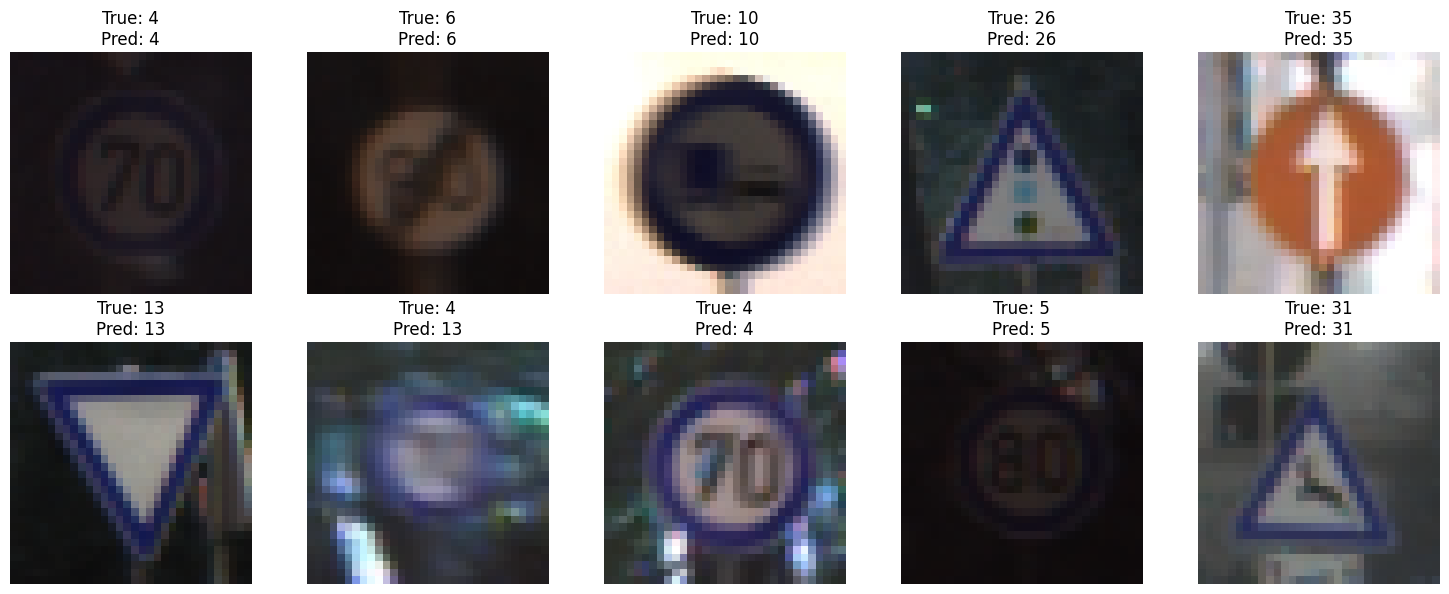

In [13]:
# 9. Show Random Predictions
plt.figure(figsize=(15, 6))
for i in range(10):
    idx = random.randint(0, len(X_test)-1)
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes_test[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
